What is Mutual Information
The elimination process aims to reduce the size of the input feature set and at the same time to retain the class discriminatory information for classification problems.

Mutual information (MI) is a measure of the amount of information between two random variables is symmetric and non-negative, and it could be zero if and only if the variables are independent.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [4]:
data = pd.read_csv('santander-train.csv', nrows = 20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [5]:
X = data.drop('TARGET', axis = 1)
y = data['TARGET']
X.shape, y.shape

((20000, 370), (20000,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

Remove constant, quasi constant, and duplicate features
These are the filters that are almost constant or quasi constant in other words these features have same values for large subset of outputs and such features are not very useful for making predictions.




Let’s go ahead see how many quasi constant features are there.

In [7]:
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

Let’s transpose the dataset training and testing dataset.

In [8]:
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

Let’s get the total number of duplicated rows.

In [9]:
X_train_T.duplicated().sum()

18

In [10]:
duplicated_features = X_train_T.duplicated()

Let’s get the non-duplicated features.

In [11]:
features_to_keep = [not index for index in duplicated_features]
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T
X_train_unique.shape, X_test_unique.shape

((16000, 227), (4000, 227))

Now, we can observe here out of 370 we have only 227 features.

Calculate the MI
Let’s calculate the mutual information among the 227 features.

mutual_info_classif( )
Mutual information measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [12]:
mi = mutual_info_classif(X_train_unique, y_train) 
len(mi)

227

In [13]:
mi

array([2.51347636e-03, 0.00000000e+00, 1.45935559e-02, 0.00000000e+00,
       0.00000000e+00, 4.16408638e-04, 0.00000000e+00, 3.37390026e-04,
       0.00000000e+00, 0.00000000e+00, 1.98267332e-03, 0.00000000e+00,
       2.66326506e-04, 0.00000000e+00, 1.44291319e-03, 0.00000000e+00,
       2.23326142e-03, 1.39727328e-03, 1.44828175e-03, 0.00000000e+00,
       0.00000000e+00, 4.29612314e-03, 9.51631032e-03, 7.78165250e-04,
       3.10913709e-04, 2.93302758e-04, 2.50121470e-04, 2.59662815e-03,
       0.00000000e+00, 1.45446041e-03, 7.25767965e-04, 1.60799785e-03,
       6.93708658e-04, 1.81304455e-03, 7.34438276e-04, 6.33301956e-04,
       0.00000000e+00, 4.12660679e-04, 9.23045559e-03, 1.52765901e-03,
       1.14576242e-03, 5.66602077e-03, 3.57486317e-03, 8.23508253e-04,
       0.00000000e+00, 1.01210686e-02, 2.40799223e-03, 8.97637720e-03,
       9.75268048e-04, 0.00000000e+00, 9.50826463e-05, 0.00000000e+00,
       0.00000000e+00, 1.20453981e-03, 4.13091907e-03, 2.53626248e-03,
      

In [14]:
#higher the mutual information higher importance o features

In [15]:
mi = pd.Series(mi)
mi.index = X_train_unique.columns

In [16]:
mi.sort_values(ascending=False, inplace = True)

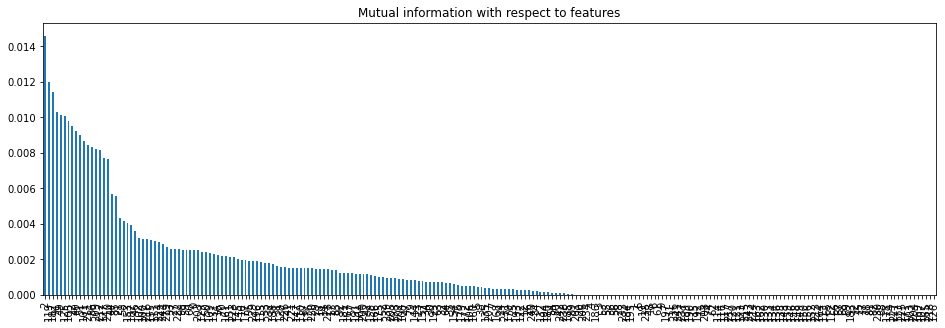

In [17]:
plt.title('Mutual information with respect to features')
mi.plot.bar(figsize = (16,5))
plt.show()

Let’s go ahead and work with percentile. We will select 10 percentile of the features. Let’s have a look at following code.

In [18]:
X_train_unique

,0,1,2,3,4,5,6,7,8,9,...,235,236,237,238,239,240,241,242,243,244
0,17282.0,2.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63200.700000
1,38270.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88640.610000
2,31526.0,2.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96314.160000
3,38737.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117568.020000
4,16469.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,38333.0,2.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53324.460000
15996,26389.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56028.480000
15997,2025.0,2.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38272.440000
15998,17327.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [19]:
sel = SelectPercentile(mutual_info_classif, percentile=10).fit(X_train_unique, y_train)
X_train_unique.columns[sel.get_support()]
print(sel.get_support()) #konse select hue or konse nhi(true --selected,,,false ---not selected)

[False False  True False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False False  True False False  True False False False
 False False  True False False False False False False  True False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
  True False False False False  True  True False  True False  True False
 False False False False False False False False False False False  True
 False False False False  True False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False  T

In [21]:
len(X_train_unique.columns[sel.get_support()]) #23 features selected

23

In [22]:
X_train_mi = sel.transform(X_train_unique)
X_test_mi = sel.transform(X_test_unique)
X_train_mi.shape

(16000, 23)

In [23]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))

In [24]:
%%time
run_randomForest(X_train_mi, X_test_mi, y_train, y_test)

Accuracy on test set: 
0.9585
Wall time: 833 ms


In [27]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy on test set: 
0.9585
Wall time: 2.19 s


Mutual Information Gain in Regression

In [28]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [30]:
X = pd.DataFrame(data = boston.data, columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [31]:
y = boston.target

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [33]:
mi = mutual_info_regression(X_train, y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False, inplace = True)
mi

LSTAT      0.678480
RM         0.557651
INDUS      0.516164
PTRATIO    0.471905
NOX        0.450975
TAX        0.392255
CRIM       0.369381
AGE        0.344109
DIS        0.325769
RAD        0.206309
ZN         0.200715
B          0.148452
CHAS       0.012946
dtype: float64

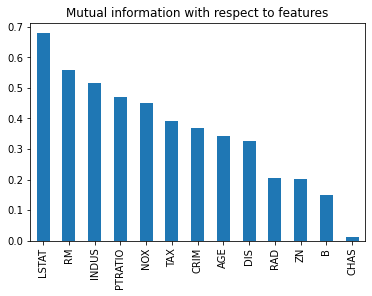

In [34]:
plt.title('Mutual information with respect to features')
mi.plot.bar()
plt.show()

In [35]:
sel = SelectKBest(mutual_info_regression, k = 9).fit(X_train, y_train)
X_train.columns[sel.get_support()]

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

In [36]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
r2_score(y_test, y_predict)

0.5892223849182524

In [37]:
np.sqrt(mean_squared_error(y_test, y_predict))

5.783509315085124

In [38]:
np.std(y)

9.188011545278203

In [39]:
X_train_9 = sel.transform(X_train)
X_train_9.shape

(404, 9)

In [42]:
X_test_9 = sel.transform(X_test)
model = LinearRegression()
model.fit(X_train_9, y_train)
y_predict = model.predict(X_test_9)
print('r2_score')
r2_score(y_test, y_predict)


r2_score


0.5317127606961576

In [41]:
print('rmse')
np.sqrt(mean_squared_error(y_test, y_predict))

rmse


6.175103151293747